In [1]:
#importing the libraries needed 
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint


#Declaring the headers 
headers = {"Accept-Language": "en-US,en;q=0.5"}

#declaring the list of empty variables, So that we can append the data overall

movie_name = []
year = []
time=[]
rating=[]
metascore =[]
votes = []
gross = []
description = []
Director=[]
Stars=[]
Certificate=[]
Genre=[]

#creating an array of values and passing it in the url for dynamic webpages
pages = np.arange(1,10000,50)

#the whole core of the script
for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?title_type=feature&num_votes=10000,&sort=user_rating,desc&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
    sleep(randint(2,8))
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)
        
        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text
        year.append(year_of_release)
        
        runtime = store.p.find("span", class_ = 'runtime').text
        time.append(runtime)
        
        rate = store.find('div', class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
        rating.append(rate)
        
        meta = store.find('span', class_ = "metascore").text if store.find('span', class_ = "metascore") else "****"
        metascore.append(meta)
        
        certificates = store.find('span', class_='certificate').text if store.find('span', class_='certificate') else "****"
        Certificate.append(certificates)
        
        
        value = store.find_all('span', attrs = {'name': "nv"})
        
        vote = value[0].text
        votes.append(vote)
        
        grosses = value[1].text if len(value)>1 else '%^%^%^'
        gross.append(grosses)
        
        genres= store.find('span', class_='genre').text 
        Genre.append(genres)
        
        # Description of the Movies -- Not explained in the Video, But you will figure it out. 
        describe = store.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
        description.append(description_)
        
        Cast = store.find('p', class_='')
        casts = Cast.text.replace("\n","").split('|')
        casts=[x.strip() for x in casts] if len(casts)>1 else '###'
        casts=[casts[i].replace(j,'') for i,j in enumerate(["Director:","Stars:"])]
        Director.append(casts[0])
        Stars.append([x.strip() for x in casts[1].split(',')])
        
#creating a dataframe 
movie_list = pd.DataFrame({ "Movie Name": movie_name,'Genre':Genre, "Year of Release" : year,"Certificate": Certificate, "Watch Time": time,"Movie Rating": rating, "Meatscore of movie": metascore, "Votes" : votes, "Gross": gross, "Description": description, 'Director Name': Director, "Stars": Stars  })


In [2]:
movie_list.head()

,Movie Name,Genre,Year of Release,Certificate,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description,Director Name,Stars
0,The Shawshank Redemption,\nDrama,(1994),A,142 min,9.3,82,"2,813,477",$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,"\nCrime, Drama",(1972),A,175 min,9.2,100,"1,960,785",$134.97M,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,Ramayana: The Legend of Prince Rama,"\nAnimation, Action, Adventure",(1993),U,135 min,9.2,****,"13,146",%^%^%^,An anime adaptation of the Hindu epic the Rama...,"Directors:Ram Mohan, Yûgô Sakô, Koichi Saski","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ..."
3,Hababam Sinifi,"\nComedy, Drama",(1975),****,87 min,9.2,****,"42,295",%^%^%^,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"[Kemal Sunal, Münir Özkul, Halit Akçatepe, Tar..."
4,The Dark Knight,"\nAction, Crime, Drama",(2008),UA,152 min,9.0,84,"2,795,162",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."


In [3]:
df=movie_list

Treating Genre column

In [4]:
df['Genre']=df['Genre'].str.replace('\n','')
df['Genre'].head()

0                           Drama            
1                    Crime, Drama            
2    Animation, Action, Adventure            
3                   Comedy, Drama            
4            Action, Crime, Drama            
Name: Genre, dtype: object

 Treating Year of release column

In [5]:
df['Year of Release']=df['Year of Release'].str.replace('(',"")
df['Year of Release']=df['Year of Release'].str.replace(')',"")
df['Year of Release']=df['Year of Release'].str.replace('I',"")
df['Year of Release']=df['Year of Release'].str.replace('V',"")
df['Year of Release']=df['Year of Release'].str.replace('X',"")



df['Year of Release']=df['Year of Release'].astype(int)

In [6]:
df['Year of Release'].isnull().sum()

0

Treating Certificate column

In [7]:
df['Certificate'].mode()

0    R
Name: Certificate, dtype: object

In [8]:
df['Certificate']=df['Certificate'].str.replace("****","R", regex=False)

In [9]:
df['Certificate']

0        A
1        A
2        U
3        R
4       UA
        ..
9995     A
9996     A
9997    UA
9998     U
9999     U
Name: Certificate, Length: 10000, dtype: object

Treating Votes Variable

In [10]:
df['Votes']=df['Votes'].str.replace(',','').astype(int)
df['Votes']

0       2813477
1       1960785
2         13146
3         42295
4       2795162
         ...   
9995      11169
9996      12337
9997     101860
9998      46086
9999      49988
Name: Votes, Length: 10000, dtype: int32

Treating Watch time variable

In [11]:
df['Watch Time']=df['Watch Time'].str.replace('min','').astype(int)

In [12]:
df['Watch Time']

0       142
1       175
2       135
3        87
4       152
       ... 
9995    114
9996     86
9997     97
9998     89
9999    101
Name: Watch Time, Length: 10000, dtype: int32

Treating gross variable

In [13]:
df['Gross']=df['Gross'].str.replace('$','')
df['Gross']=df['Gross'].str.replace('M','')
df['Gross']=df['Gross'].str.replace('%^%^%^','0', regex=False)
df['Gross']=df['Gross'].str.replace('.','')
df['Gross']=df['Gross'].str.replace('#','')
#df['Gross']=df['Gross'].str.replace('0',)



df['Gross']=df['Gross'].astype(float)

In [14]:
mean=df['Gross'].mean()

In [15]:
mean

2843.9823

In [16]:
df['Gross']=df['Gross'].replace(0,mean)
df['Gross']

0        2834.0000
1       13497.0000
2        2843.9823
3        2843.9823
4       53486.0000
           ...    
9995     2843.9823
9996     1158.0000
9997     4334.0000
9998     5866.0000
9999     6602.0000
Name: Gross, Length: 10000, dtype: float64

Treating movie rating value

In [17]:
df['Movie Rating'].isnull().sum()

0

In [18]:
df['Movie Rating']=df['Movie Rating'].astype(float)

Treating Metascore variable


In [19]:
df['Meatscore of movie']=df['Meatscore of movie'].replace('****','0')

In [20]:
df['Meatscore of movie'].isnull().sum()

0

In [21]:
df['Meatscore of movie']=df['Meatscore of movie'].astype(float)

In [22]:
mean_metascore=df['Meatscore of movie'].mean()

In [23]:
df['Meatscore of movie']=df['Meatscore of movie'].replace(0,mean_metascore)

Info of df 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Name          10000 non-null  object 
 1   Genre               10000 non-null  object 
 2   Year of Release     10000 non-null  int32  
 3   Certificate         10000 non-null  object 
 4   Watch Time          10000 non-null  int32  
 5   Movie Rating        10000 non-null  float64
 6   Meatscore of movie  10000 non-null  float64
 7   Votes               10000 non-null  int32  
 8   Gross               10000 non-null  float64
 9   Description         10000 non-null  object 
 10  Director Name       10000 non-null  object 
 11  Stars               10000 non-null  object 
dtypes: float64(3), int32(3), object(6)
memory usage: 820.4+ KB


In [25]:
STARS=[]

for i in df['Stars']:
    string = ''.join(i)
    STARS.append(string)

In [26]:
df['STARS']=STARS

In [27]:
df.head()

,Movie Name,Genre,Year of Release,Certificate,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description,Director Name,Stars,STARS
0,The Shawshank Redemption,Drama,1994,A,142,9.3,82.0000,2813477,2834.0000,"Over the course of several years, two convicts...",Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",Tim RobbinsMorgan FreemanBob GuntonWilliam Sadler
1,The Godfather,"Crime, Drama",1972,A,175,9.2,100.0000,1960785,13497.0000,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",Marlon BrandoAl PacinoJames CaanDiane Keaton
2,Ramayana: The Legend of Prince Rama,"Animation, Action, Adventure",1993,U,135,9.2,47.2817,13146,2843.9823,An anime adaptation of the Hindu epic the Rama...,"Directors:Ram Mohan, Yûgô Sakô, Koichi Saski","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ...",Arun GovilNikhil KapoorEdie MirmanRael Padamsee
3,Hababam Sinifi,"Comedy, Drama",1975,R,87,9.2,47.2817,42295,2843.9823,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"[Kemal Sunal, Münir Özkul, Halit Akçatepe, Tar...",Kemal SunalMünir ÖzkulHalit AkçatepeTarik Akan
4,The Dark Knight,"Action, Crime, Drama",2008,UA,152,9.0,84.0000,2795162,53486.0000,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",Christian BaleHeath LedgerAaron EckhartMichael...


In [28]:
df.drop(columns='Stars',axis=1,inplace=True)

In [29]:
df.head()

,Movie Name,Genre,Year of Release,Certificate,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description,Director Name,STARS
0,The Shawshank Redemption,Drama,1994,A,142,9.3,82.0000,2813477,2834.0000,"Over the course of several years, two convicts...",Frank Darabont,Tim RobbinsMorgan FreemanBob GuntonWilliam Sadler
1,The Godfather,"Crime, Drama",1972,A,175,9.2,100.0000,1960785,13497.0000,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,Marlon BrandoAl PacinoJames CaanDiane Keaton
2,Ramayana: The Legend of Prince Rama,"Animation, Action, Adventure",1993,U,135,9.2,47.2817,13146,2843.9823,An anime adaptation of the Hindu epic the Rama...,"Directors:Ram Mohan, Yûgô Sakô, Koichi Saski",Arun GovilNikhil KapoorEdie MirmanRael Padamsee
3,Hababam Sinifi,"Comedy, Drama",1975,R,87,9.2,47.2817,42295,2843.9823,"Lazy, uneducated students share a very close b...",Ertem Egilmez,Kemal SunalMünir ÖzkulHalit AkçatepeTarik Akan
4,The Dark Knight,"Action, Crime, Drama",2008,UA,152,9.0,84.0000,2795162,53486.0000,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian BaleHeath LedgerAaron EckhartMichael...


In [30]:
index=[]

for i in range(0,len(df['Genre'])):
    indices = i
    index.append(indices)

In [31]:
df['index']=index

In [32]:
df.tail()

,Movie Name,Genre,Year of Release,Certificate,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description,Director Name,STARS,index
9995,2067,"Mystery, Sci-Fi",2020,A,114,4.9,39.0,11169,2843.9823,One man's journey to the future to save a dyin...,Seth Larney,Aaron GlenaneKodi Smit-McPheeRyan KwantenFinn ...,9995
9996,Graveyard Shift,Horror,1990,A,86,4.9,28.0,12337,1158.0000,In a very old textile mill with a serious rat ...,Ralph S. Singleton,David AndrewsKelly WolfStephen MachtAndrew Divoff,9996
9997,Year One,Comedy,2009,UA,97,4.9,34.0,101860,4334.0000,"After being banished from their tribe, two hun...",Harold Ramis,Jack BlackMichael CeraOlivia WildeOliver Platt,9997
9998,"Honey, I Blew Up the Kid","Adventure, Comedy, Family",1992,U,89,4.9,50.0,46086,5866.0000,"The Szalinski family is back, this time hilari...",Randal Kleiser,Rick MoranisMarcia StrassmanRobert OliveriDani...,9998
9999,Herbie Fully Loaded,"Adventure, Comedy, Family",2005,U,101,4.9,47.0,49988,6602.0000,"Maggie Peyton, the new owner of Herbie, Number...",Angela Robinson,Lindsay LohanMichael KeatonCheryl HinesBreckin...,9999


# EDA

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df.isnull().sum()

Movie Name            0
Genre                 0
Year of Release       0
Certificate           0
Watch Time            0
Movie Rating          0
Meatscore of movie    0
Votes                 0
Gross                 0
Description           0
Director Name         0
STARS                 0
index                 0
dtype: int64

In [35]:
df.describe()

,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,index
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000
mean,2001.42190,110.876100,6.732340,56.823147,9.316653e+04,3690.920229,4999.50000
std,18.64153,22.087452,0.815332,16.132127,1.722230e+05,5699.026167,2886.89568
min,1915.00000,45.000000,4.900000,7.000000,1.000200e+04,1.000000,0.00000
25%,1994.00000,96.000000,6.100000,47.281700,1.692150e+04,700.000000,2499.75000
50%,2007.00000,107.000000,6.700000,53.000000,3.435050e+04,2843.982300,4999.50000
75%,2015.00000,121.000000,7.300000,68.000000,9.196150e+04,3259.250000,7499.25000
max,2023.00000,439.000000,9.300000,100.000000,2.813477e+06,93666.000000,9999.00000


In [36]:
df['Movie Name'].head()

0               The Shawshank Redemption
1                          The Godfather
2    Ramayana: The Legend of Prince Rama
3                         Hababam Sinifi
4                        The Dark Knight
Name: Movie Name, dtype: object

In [37]:
df['Movie Name'].tail()

9995                        2067
9996             Graveyard Shift
9997                    Year One
9998    Honey, I Blew Up the Kid
9999         Herbie Fully Loaded
Name: Movie Name, dtype: object

In [38]:
print("No. of rows:", df.shape[0])
print("No. of column:" ,df.shape[1])

No. of rows: 10000
No. of column: 13


In [39]:
df.duplicated().any()

False

In [40]:
import matplotlib.pyplot as plt

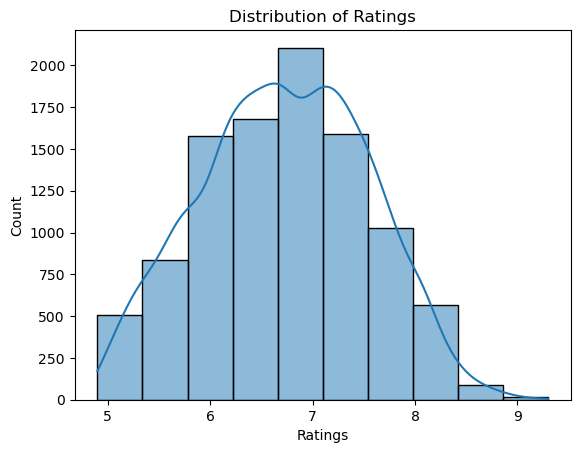

In [41]:
#Count of ratings given

sns.histplot(df['Movie Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [42]:
# movies having rating grater than 9


df[df['Movie Rating']>=9]['Movie Name'].head()

0               The Shawshank Redemption
1                          The Godfather
2    Ramayana: The Legend of Prince Rama
3                         Hababam Sinifi
4                        The Dark Knight
Name: Movie Name, dtype: object

In [43]:
# top 5 movies having run time grater than 180 minutes

df[df['Watch Time']>=180]['Movie Name'].head()

5                                  Schindler's List
6     The Lord of the Rings: The Return of the King
8                             The Godfather Part II
13                                       Al-risâlah
36               Kill Bill: The Whole Bloody Affair
Name: Movie Name, dtype: object

In [44]:
#in which year there was the highest average voting
df.groupby('Year of Release')['Votes'].mean().sort_values(ascending=False).head()

Year of Release
1999    129890.505682
1994    126421.367647
2004    122496.074689
2001    121991.888889
2003    121673.522167
Name: Votes, dtype: float64

In [45]:
#in which year there was the highest revenue
df.groupby('Year of Release')['Gross'].mean().sort_values(ascending=False).head()


Year of Release
2019    4821.443761
2022    4589.312482
2003    4328.588866
2002    4319.636753
2000    4254.337422
Name: Gross, dtype: float64

In [46]:
#Directors with highest average ratings

director_rating = df.groupby('Director Name')['Movie Rating'].mean().sort_values(ascending=False).head()
director_rating

Director Name
Directors:Ram Mohan, Yûgô Sakô, Koichi Saski    9.2
Amitabh Reza Chowdhury                          9.0
Directors:Lenka Debiprasad, Vishal Mourya       9.0
Kiranraj K                                      8.8
T.J. Gnanavel                                   8.8
Name: Movie Rating, dtype: float64

In [47]:
#top 10 lenghty movies with runtime

top10_len =df.nlargest(10,'Watch Time')[['Movie Name', 'Watch Time']].set_index('Movie Name')

<Axes: xlabel='Watch Time', ylabel='Movie Name'>

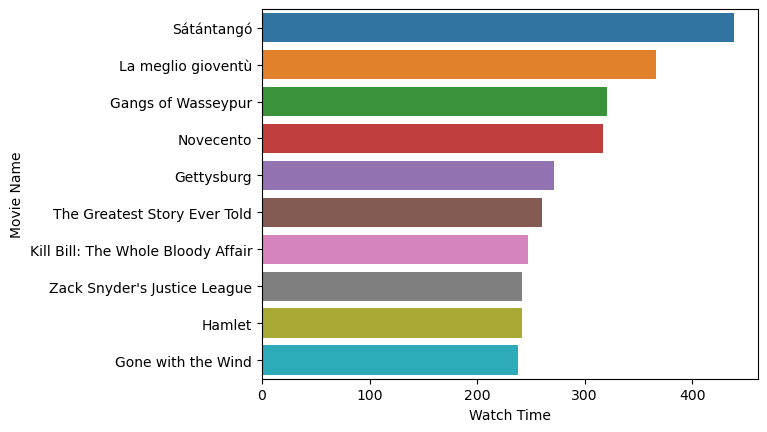

In [48]:
sns.barplot(x='Watch Time', y = top10_len.index, data=top10_len)

In [49]:
#no. of movies per year
no_of_release =df['Year of Release'].value_counts().sort_values(ascending=False).head()
no_of_release

Year of Release
2018    350
2014    346
2013    337
2016    336
2017    329
Name: count, dtype: int64

In [50]:
#Movie with Highest revenue

df[df['Gross'].max()==df['Gross']]['Movie Name']

904    Star Wars: Episode VII - The Force Awakens
Name: Movie Name, dtype: object

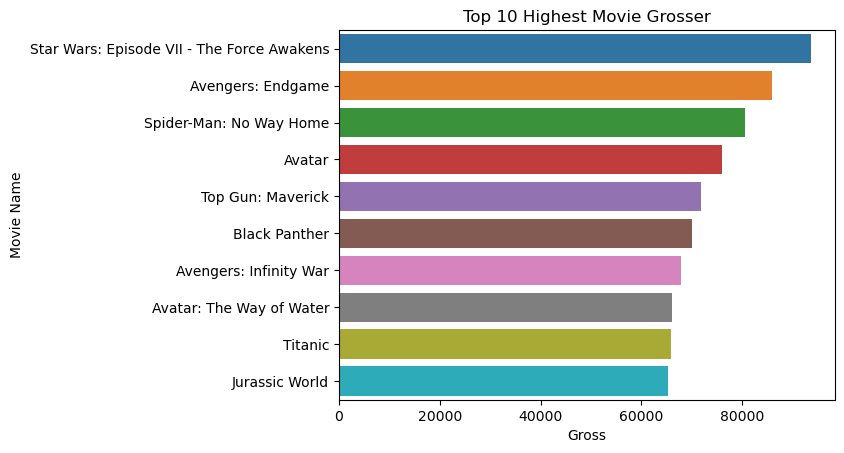

In [51]:
#top 10 movies with highest revenue

top10movies=df.nlargest(10,'Gross')[['Movie Name','Gross']].set_index('Movie Name')
sns.barplot(x='Gross', y=top10movies.index, data=top10movies)
plt.title('Top 10 Highest Movie Grosser')
plt.show()

In [52]:
#Top 5 Genres

df['Genre'].value_counts().sort_values(ascending=False).head()

Genre
Comedy, Drama, Romance                480
Drama                                 427
Comedy, Drama                         402
Drama, Romance                        348
Action, Crime, Drama                  327
Name: count, dtype: int64

<Axes: xlabel='Gross', ylabel='Movie Rating'>

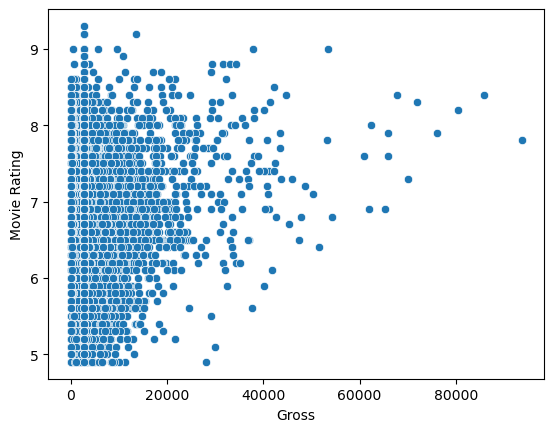

In [53]:
#does rating affect movies revenue

sns.scatterplot(x='Gross', y='Movie Rating', data=df)

Yes, Movie Rating does affect the Movie's Collection

In [54]:
df1=df[['Year of Release', 'Watch Time','Movie Rating','Meatscore of movie','Votes','Gross']]

In [55]:
corr=df1.corr()

<Axes: >

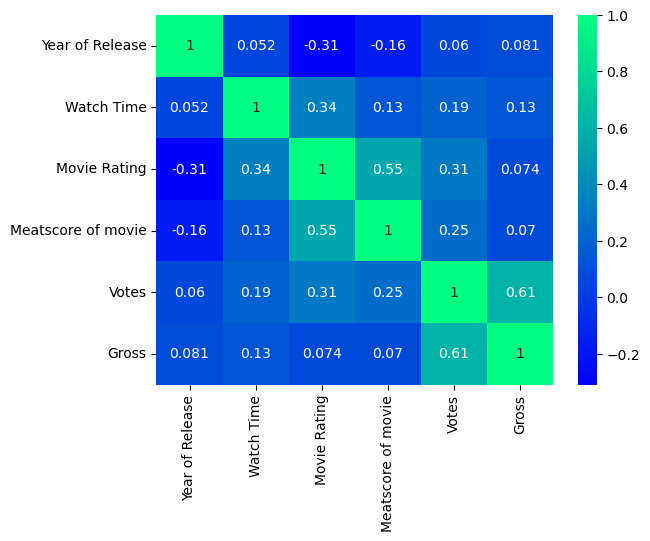

In [56]:
sns.heatmap(corr, annot=True, cmap='winter')

Model Building

In [59]:
df.columns

Index(['Movie Name', 'Genre', 'Year of Release', 'Certificate', 'Watch Time',
       'Movie Rating', 'Meatscore of movie', 'Votes', 'Gross', 'Description',
       'Director Name', 'STARS', 'index'],
      dtype='object')

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib
from sklearn.metrics.pairwise import cosine_similarity

In [113]:
combined_features = df['Genre']+" "+df['Description']+' '+df['Director Name']+df['STARS']

#transforming text data into vectors
vectorizer = TfidfVectorizer()

feature_vectors = vectorizer.fit_transform(combined_features)

#cosine similariy
similarity = cosine_similarity(feature_vectors)


#getting the movie name from user
movie_name = input('Enter your favourite movie name: ')

#creating a list with all the movie names given in the dataset
list_of_all_titles = df['Movie Name'].tolist()

#finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name,list_of_all_titles)

close_match = find_close_match[0]

#finding the index of the movie with title
index_of_the_movie = df[df['Movie Name']==close_match]['index'].values[0]

#getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))

#sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score,key = lambda x:x[1], reverse = True)

#print the name of similar movies
print('Movies suggested for you : \n')

i=1

for movie in sorted_similar_movies:
    index=movie[0]
    title_from_index= df[df.index==index]['Movie Name'].values[0]
    if (i<6):
        print(i,".",title_from_index)
        i+=1

Enter your favourite movie name: gangs of wasseypur
Movies suggested for you : 

1 . Gangs of Wasseypur
2 . Dabangg
3 . Shootout at Lokhandwala
4 . Main Hoon Na
5 . Sholay
